## Load Our Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
full_df = housing.frame


In [ ]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [ ]:
data.shape , target.shape , full_df.shape

((20640, 8), (20640,), (20640, 9))

In [ ]:
full_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
full_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**No Null Values**

In [ ]:
full_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

**This is not very useful as there is too much information, Instead we will use
 correlation matrix and a box plot to get what we need**

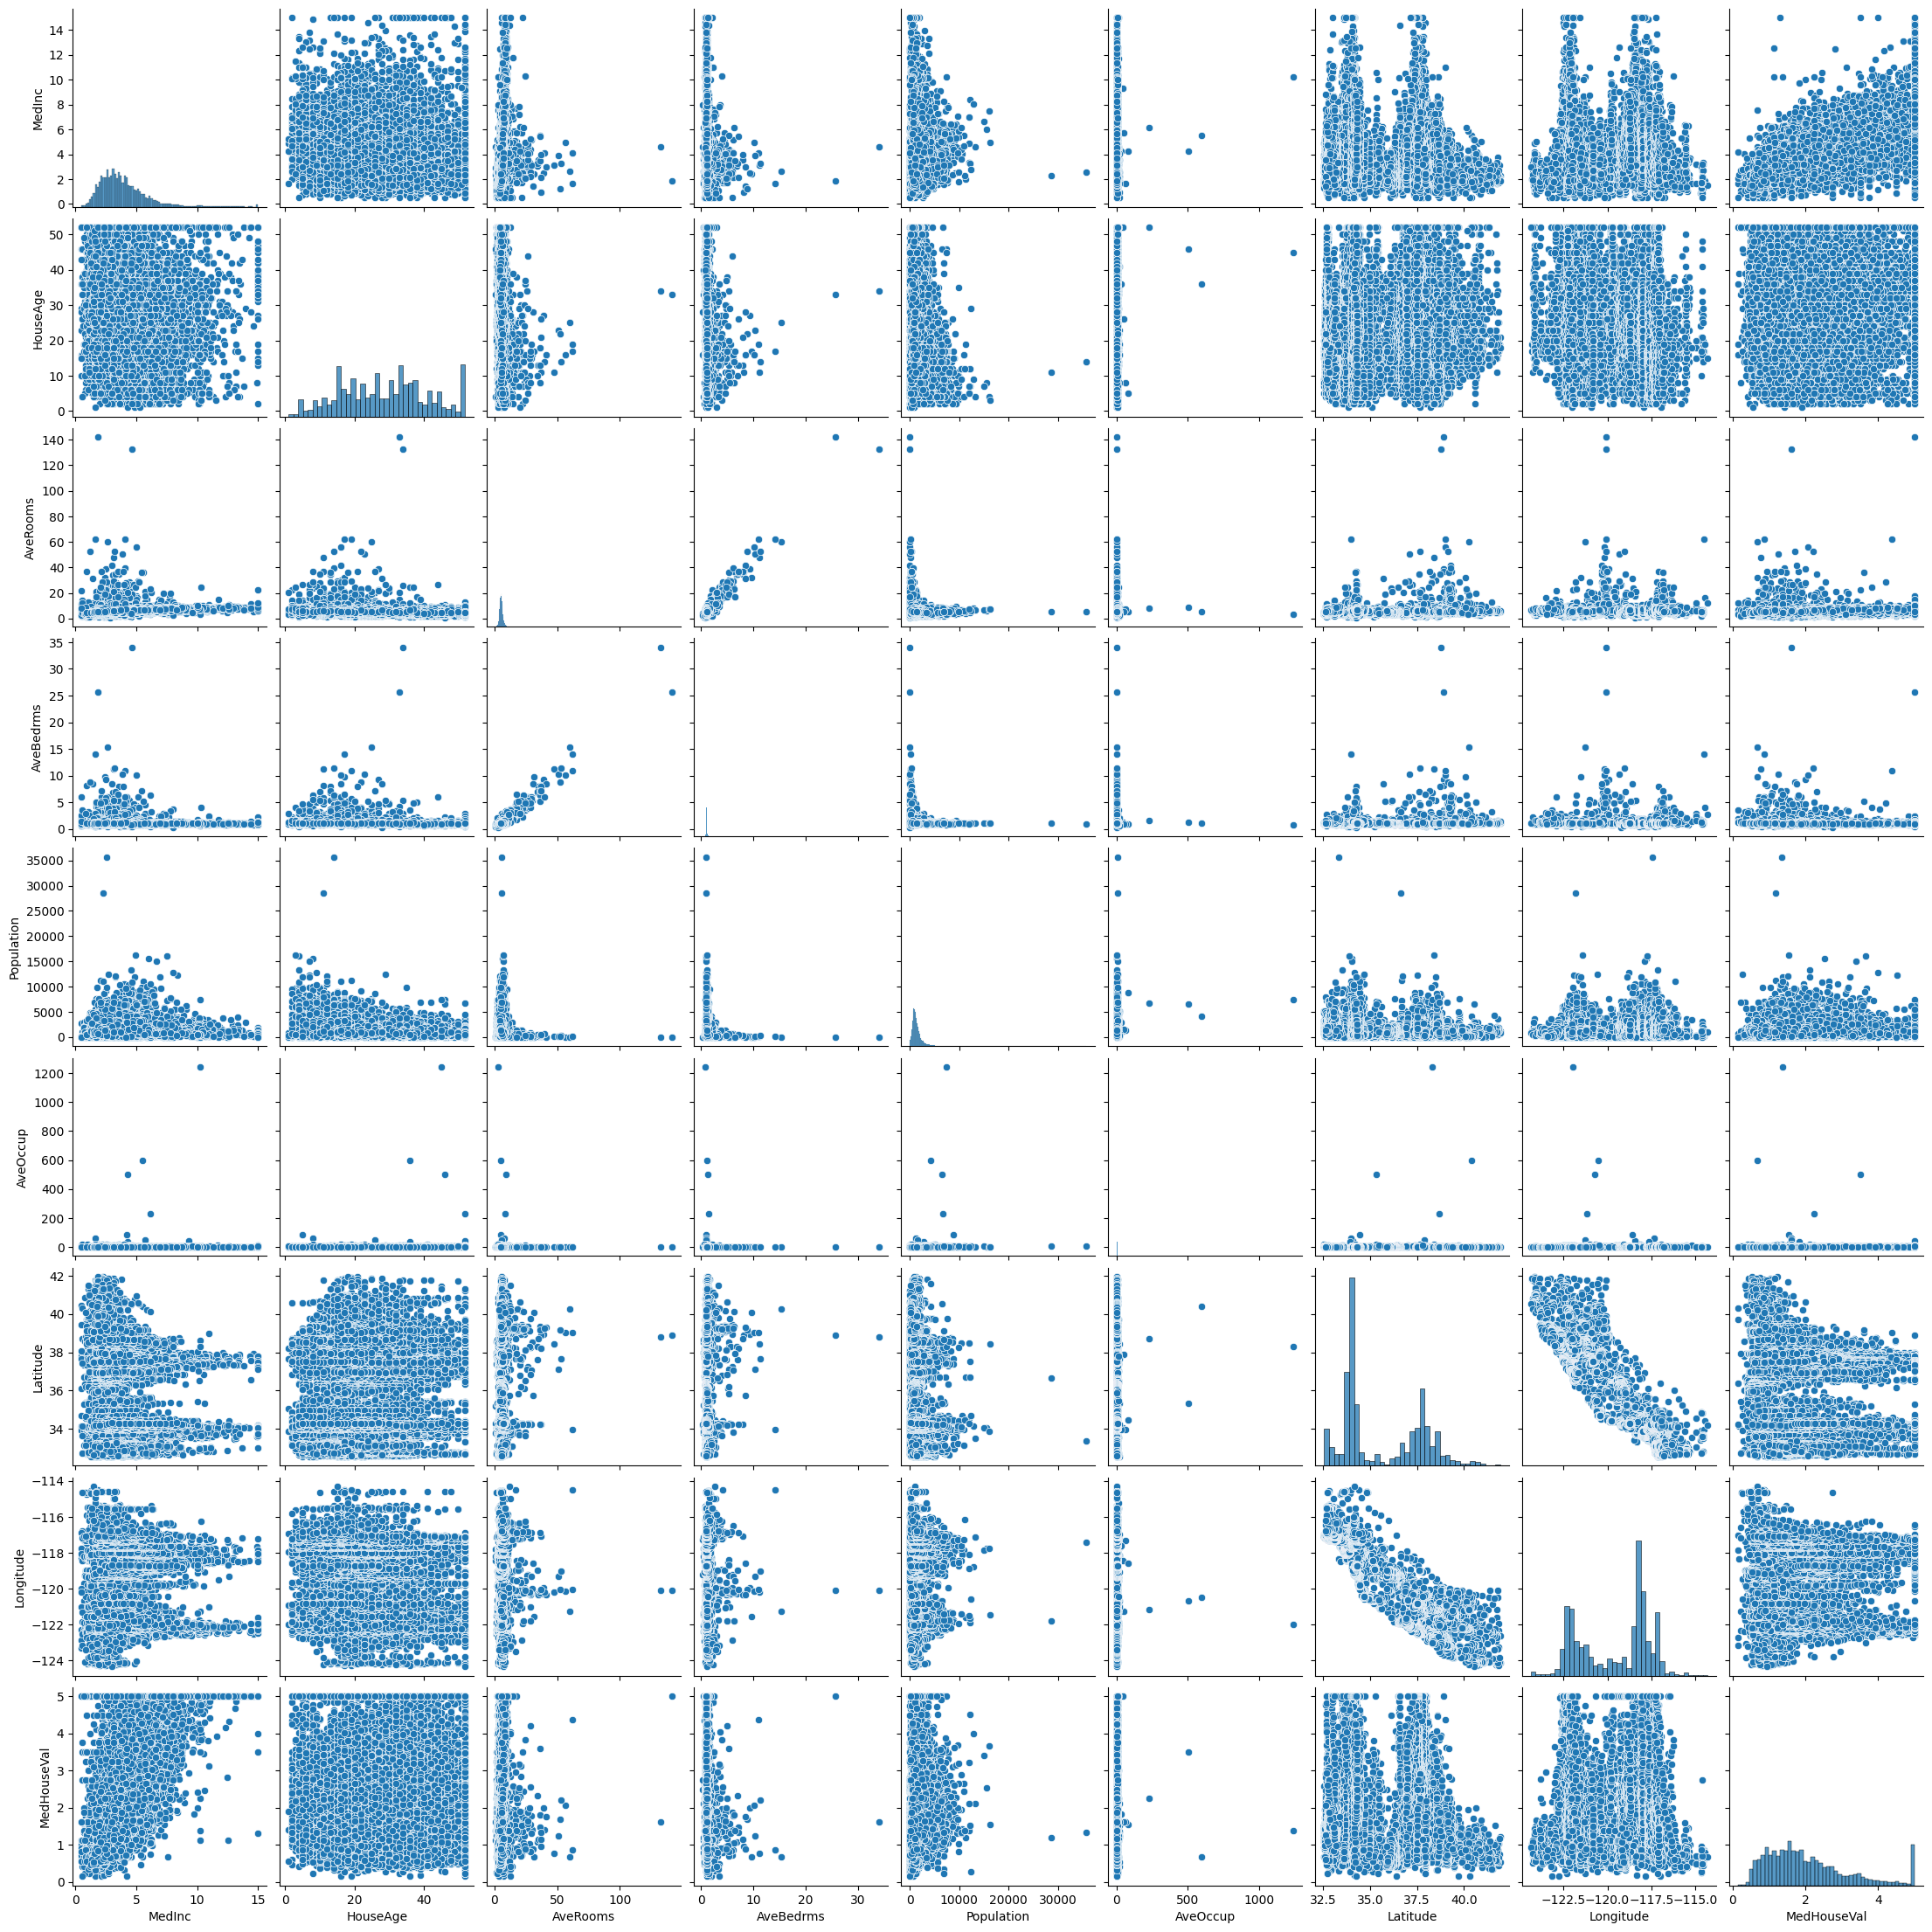

In [ ]:
import seaborn as sns
sns.pairplot(full_df)

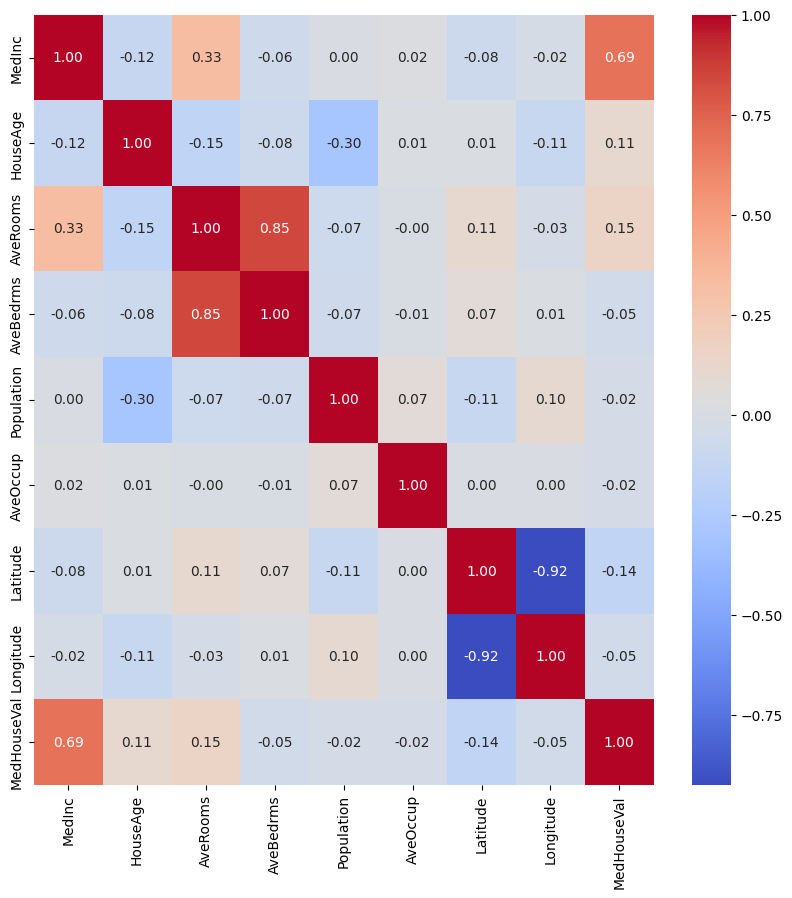

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = full_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


From the above heatmap of correlation matrix , We can extract several important insights


1.   Median Income has the highest correlation with Median House Value (0.65)
2.   High correlation between Number of room and number of bedrooms logically
3.   Latitude has abit more correlation (negatively) with House Value



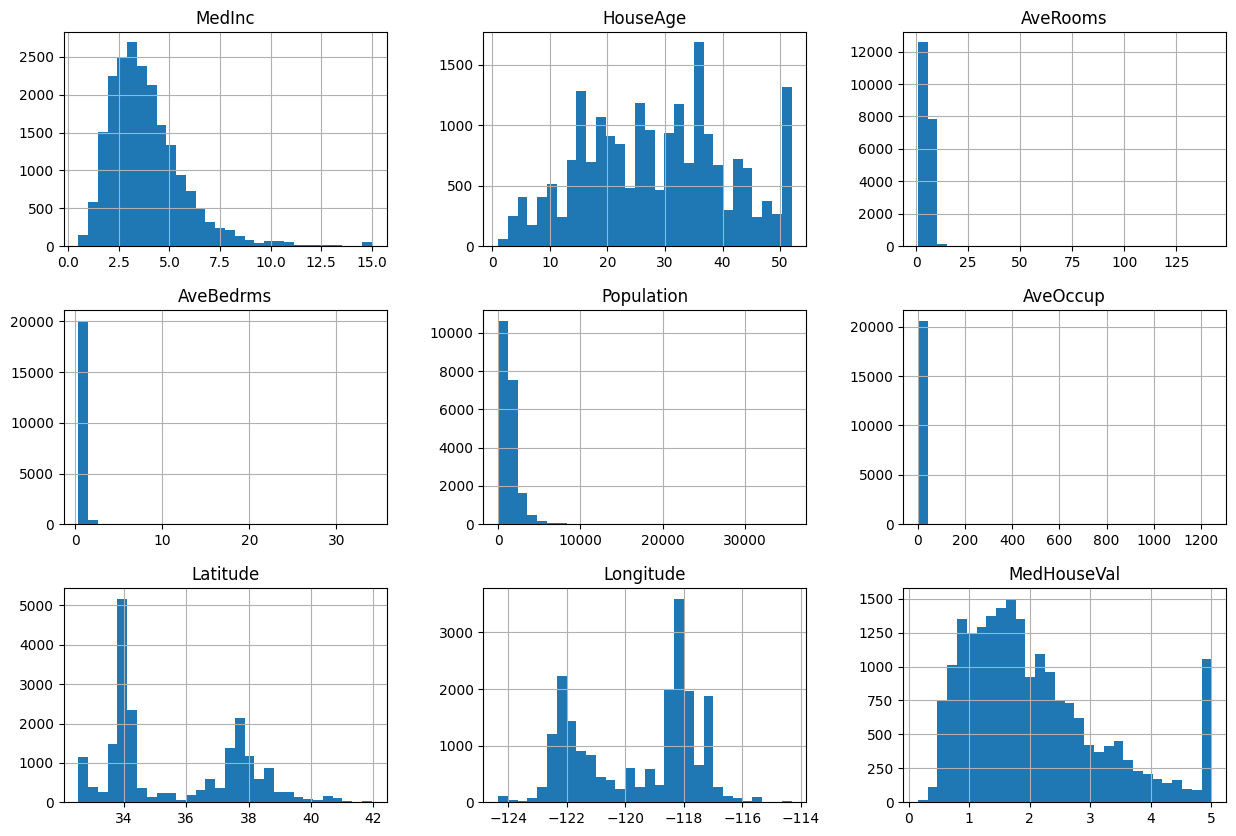

In [ ]:
full_df.hist(bins=30, figsize=(15, 10))
plt.show()


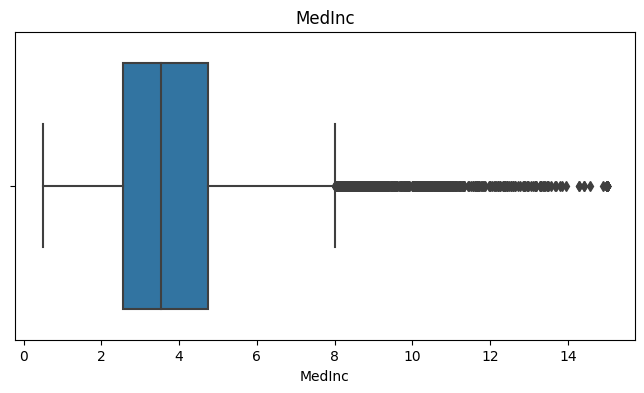

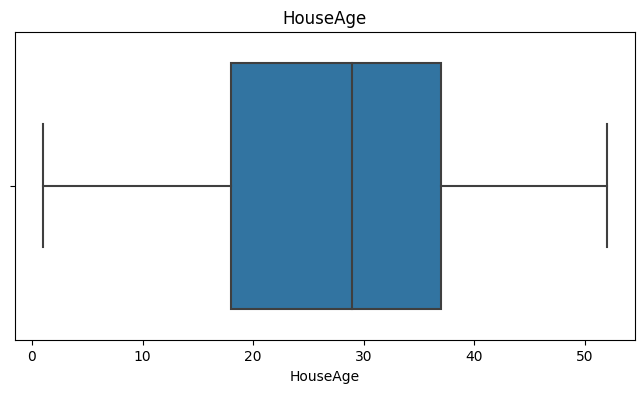

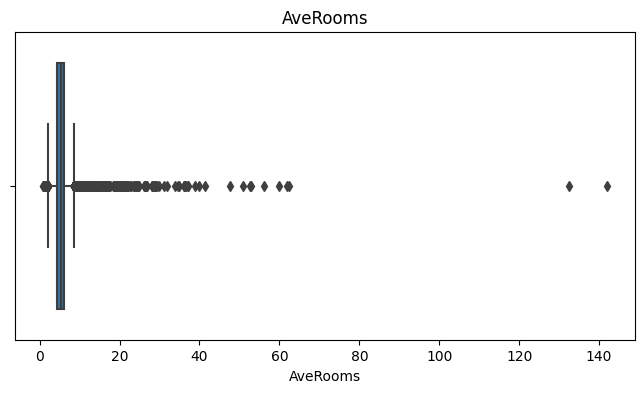

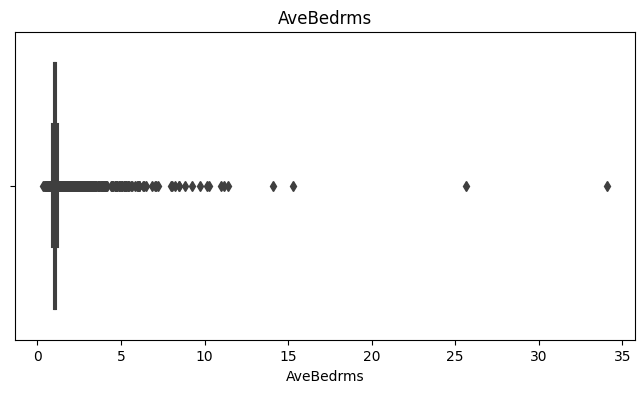

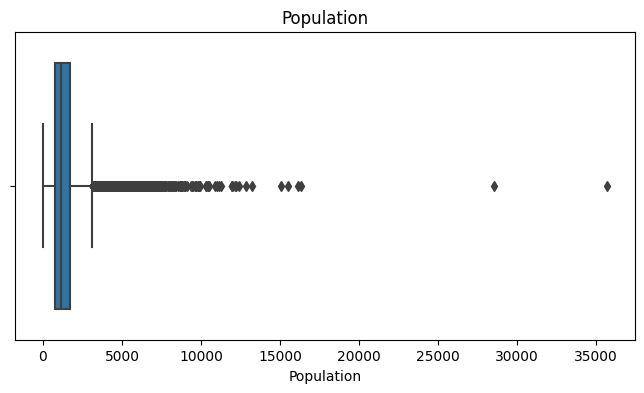

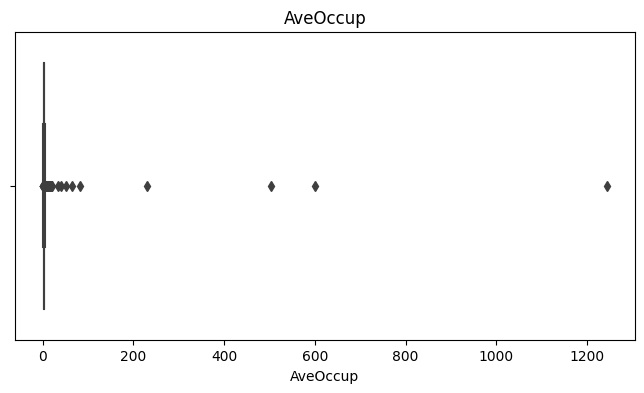

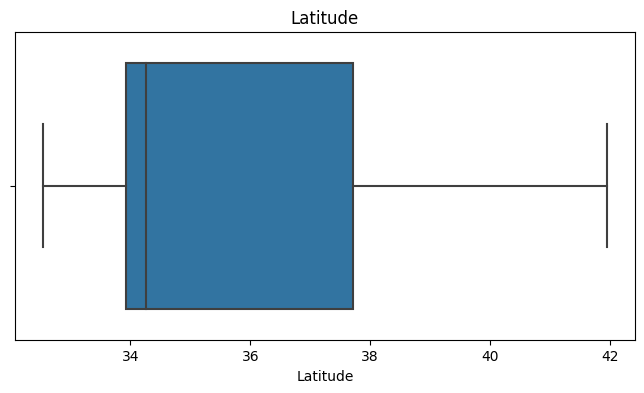

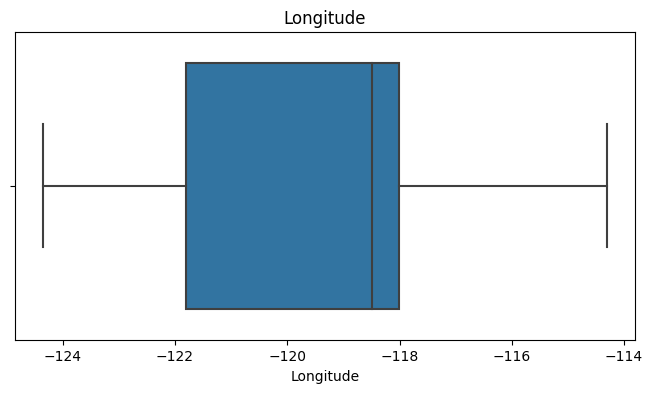

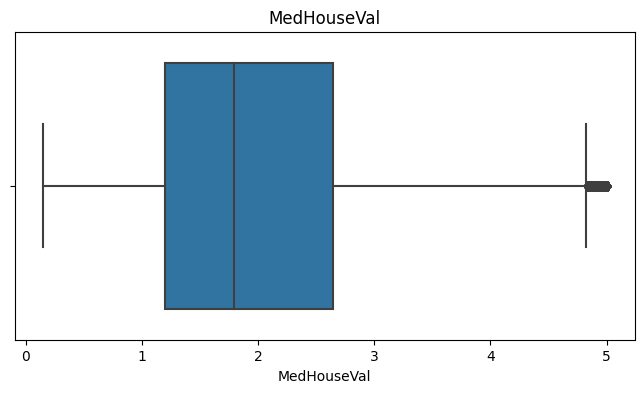

In [ ]:
for column in full_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=full_df[column])
    plt.title(column)
    plt.show()


We can observe from above the presence of sever outliers in AVg rooms and Avg bedrooms, needs to be investigated/

In [ ]:
import numpy as np
# Define a function to detect outliers based on the IQR
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] > upper_bound)]
    return outliers
def detect_outliers_std(dataframe, column, num_std=3):
    mean = dataframe[column].mean()
    std_dev = dataframe[column].std()
    outliers_mask = (np.abs(dataframe[column] - mean) > (num_std * std_dev))
    return dataframe[outliers_mask]


In [ ]:
rooms_outliers_df = detect_outliers_iqr(full_df,"AveRooms")
bedrooms_outliers_df = detect_outliers_iqr(full_df,"AveBedrms")

In [ ]:
import pandas as pd
outliers_both = pd.merge(rooms_outliers_df, bedrooms_outliers_df, how='inner')
outliers_both





,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.4196,26.0,8.518248,2.700730,253.0,1.846715,37.68,-122.08,2.750
1,2.4500,17.0,8.973684,1.855263,338.0,2.223684,38.69,-119.78,1.176
2,2.2417,15.0,10.515306,2.372449,573.0,2.923469,38.72,-119.93,0.979
3,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.406
4,3.4609,14.0,8.625304,1.708029,946.0,2.301703,38.48,-120.56,1.209
...,...,...,...,...,...,...,...,...,...
323,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12,0.889
324,2.1250,26.0,37.063492,7.185185,416.0,2.201058,38.19,-120.03,1.325
325,3.2589,9.0,11.458508,2.056161,2811.0,2.356245,37.84,-120.20,1.379
326,4.0833,18.0,11.536585,2.804878,88.0,2.146341,37.85,-119.93,1.375


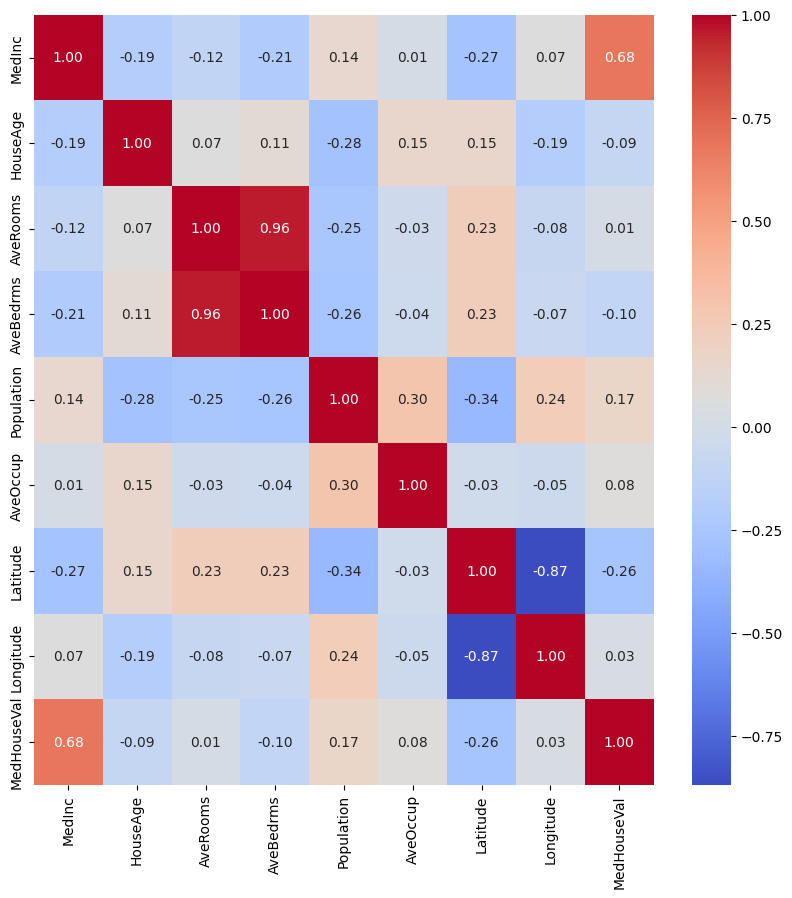

In [ ]:

outlier_corr = outliers_both.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(outlier_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

It seems to me that these might potentially be hotels/dorms which is why they such a high number of rooms

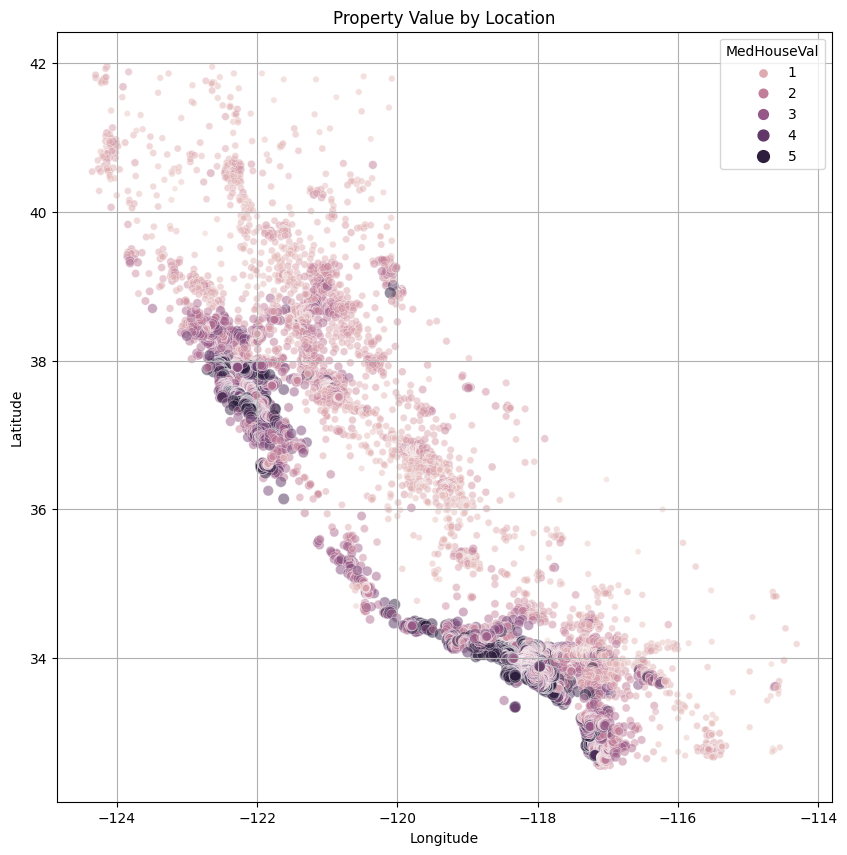

In [ ]:
#Plotting to visualize cali map
plt.figure(figsize=(10, 10))
sns.scatterplot(data=full_df, x='Longitude', y='Latitude', size='MedHouseVal', hue='MedHouseVal', alpha=0.5)
plt.title('Property Value by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
import folium

# Create a map object centered around the median Latitude and Longitude of your dataset
m = folium.Map(location=[full_df['Latitude'].median(), full_df['Longitude'].median()], zoom_start=6)

# Since Full_df is not too large, we iterate through the DataFrame and add each point to the map
for idx, row in full_df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=row['MedHouseVal']/100000, # Scale the property value for the circle size
                        popup=f"Value: ${row['MedHouseVal']*100000:.2f}",
                        color='blue',
                        fill=True,
                        fill_color='blue'
                       ).add_to(m)

# Show the map
m.save('map.html')


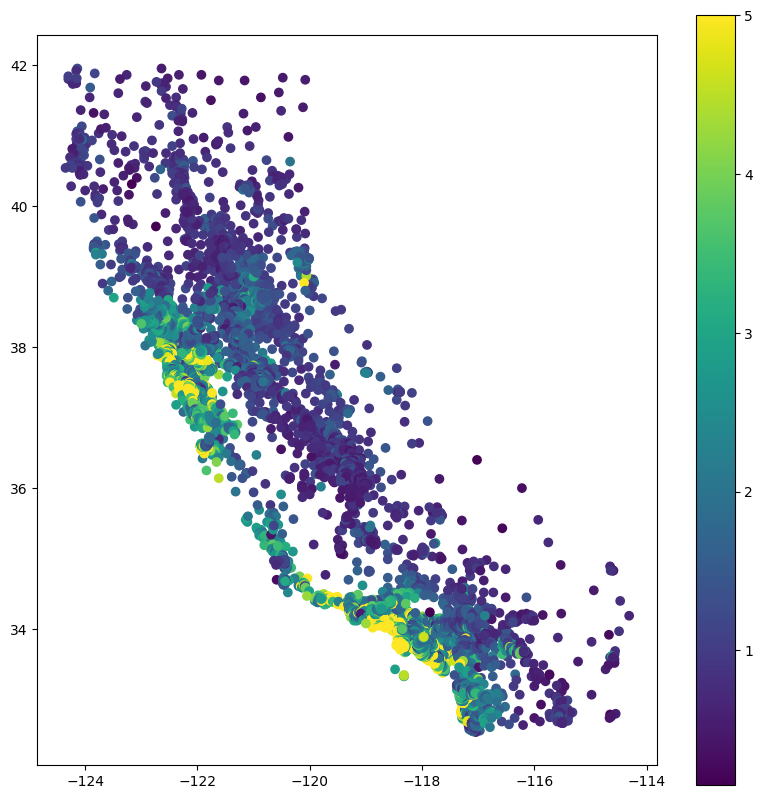

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


# First, we convert the DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(full_df, geometry=gpd.points_from_xy(full_df.Longitude, full_df.Latitude))

# We then set the coordinate reference system (CRS) for our GeoDataFrame
gdf.set_crs(epsg=4326, inplace=True)

# Now, let's plot the data using GeoPandas built-in plot method
# We can use the 'MedHouseVal' column to color-code the points
gdf.plot(column='MedHouseVal', cmap='viridis', legend=True, figsize=(10, 10))

# To show the plot
plt.show()



1.   Higher Value properties alogn the coast (Bay area, LA)
2.   Properly value seems to decrease as you move inland
3. Rural vs urban, Urban is alot more dense.
4. Northern Cali has some higher propery regions, Scacramento and San Fransisco






**I WILL try building a quick Baseline Model before changing our data WITHOUT SCALING**

In [ ]:
##This one is using Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define your features and target variable
X = full_df.drop('MedHouseVal', axis=1)
y = full_df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


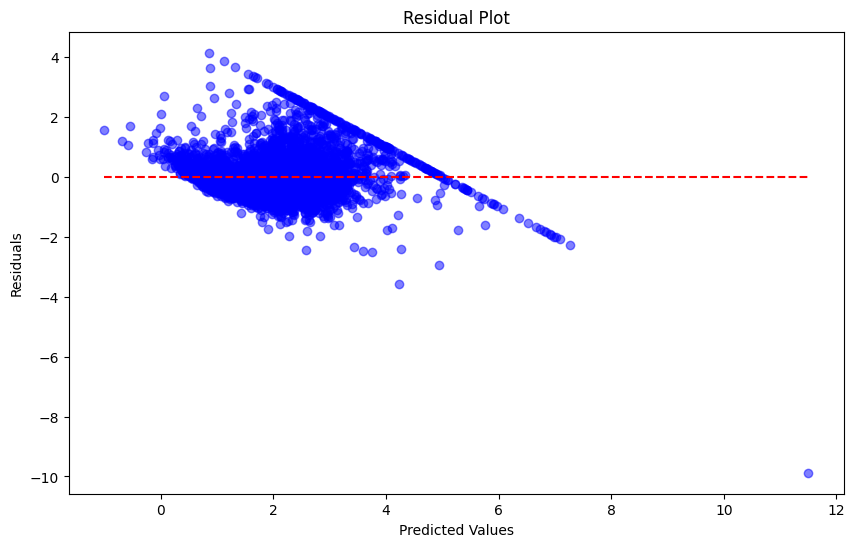

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
## I would like to use statsmodels to get more model summary
import statsmodels.api as sm

def linear_regression_stats(X, y):
    # Add a constant to the model (the intercept term)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Return the summary of the model
    return model.summary()

# Assuming X and y are already defined:
# X - your features
# y - your target variable
print(linear_regression_stats(X, y))


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:41:05   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


In [ ]:
print(linear_regression_stats(X_train_scaled, y_train))

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:49:43   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.006    369.848      0.0

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # Alpha is a hyperparameter that controls the strength of the penalty
lasso.fit(X_train_scaled, y_train)
# Predict on the testing set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5482548967938964
R^2 Score: 0.5816154300698727


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Alpha controls the regularization strength
ridge.fit(X_train_scaled, y_train)
# Predict on the testing set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558548589435971
R^2 Score: 0.5758157428913684


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)  # Max depth is one of the hyperparameters to prevent overfitting
tree.fit(X_train, y_train)  # scaling is not required for decision trees
# Predict on the testing set
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5245146178314735
R^2 Score: 0.5997321244428706


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)  # n_estimators is the number of trees
random_forest.fit(X_train, y_train)
# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.25538479798855834
R^2 Score: 0.805110616434124


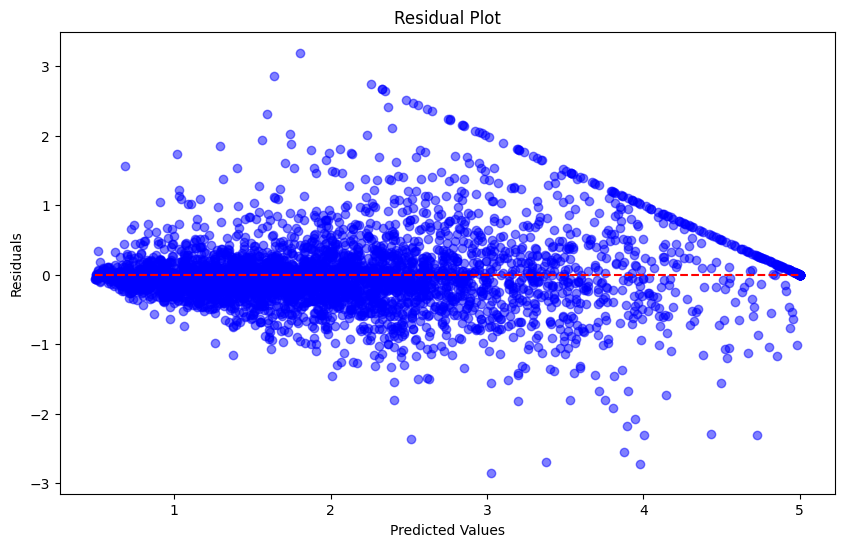

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model with a chosen kernel
svr = SVR(kernel='rbf')  # Radial basis function kernel

# Fit the model on the scaled training data
svr.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_svr = svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.25538479798855834
R^2 Score: 0.805110616434124


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32))

# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(1000):  # Number of epochs
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    if not epoch%100:
      print(f'Loss is {loss}')

# Predict and evaluate the model
with torch.inference_mode():
    y_pred_nn = net(X_test_tensor).squeeze()
    test_loss = criterion(y_pred_nn, y_test_tensor)

mse_nn = mean_squared_error(y_test_tensor, y_pred_nn)
r2_nn = r2_score(y_test_tensor, y_pred_nn)
print(f'Mean Squared Error: {mse_nn}')
print(f'R^2 Score: {r2_nn}')

Loss is 5.141051292419434
Loss is 0.6648581624031067
Loss is 0.4386163055896759
Loss is 0.38044923543930054
Loss is 0.34829333424568176
Loss is 0.3277364671230316
Loss is 0.3124571740627289
Loss is 0.2995151877403259
Loss is 0.2894654870033264
Loss is 0.2811952829360962
Mean Squared Error: 0.30092236399650574
R^2 Score: 0.7703599661005305


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate features and target variable
X_full = full_df.drop('MedHouseVal', axis=1).values
y_full = full_df['MedHouseVal'].values

# First split to separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Second split to separate out the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform training, validation, and test data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32))

X_val_tensor = torch.tensor(X_val_scaled.astype(np.float32))
y_val_tensor = torch.tensor(y_val.astype(np.float32))

X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32))

# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network, loss function, and optimizer
net = Net(X_train_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop with early stopping
val_losses = []
patience = 50  # How many epochs to wait for improvement in validation loss
best_val_loss = float('inf')
best_model = None

for epoch in range(1000):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        # Save the best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = net.state_dict()

    # Early stopping
    if epoch > patience and val_loss.item() > min(val_losses[-patience:]):
        print(f'Stopping early at epoch {epoch}')
        break

# Load the best model
net.load_state_dict(best_model)

# Evaluate on the test set
net.eval()
with torch.no_grad():
    test_outputs = net(X_test_tensor).squeeze()
    test_loss = criterion(test_outputs, y_test_tensor)

test_loss = test_loss.item()
print(f'Test Loss: {test_loss}')


Stopping early at epoch 615
Test Loss: 0.3279550075531006


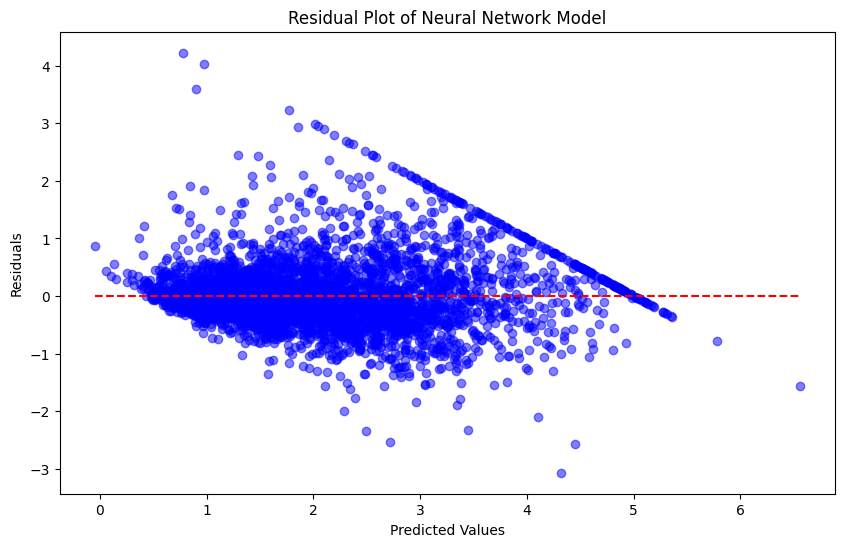

(0.7497308326615789, 0.39902863)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Convert the predictions and actual values to numpy arrays for computing residuals
y_test_np = y_test_tensor.numpy()
y_pred_np = test_outputs.numpy()

# Calculate residuals
residuals = y_test_np - y_pred_np

# Calculate R2 and MAE
r2 = r2_score(y_test_np, y_pred_np)
mae = mean_absolute_error(y_test_np, y_pred_np)

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_np, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_np.min(), xmax=y_pred_np.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Neural Network Model')
plt.show()

(r2, mae)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

class ComplexNet(nn.Module):
    def __init__(self, n_features):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(n_features, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate features and target variable
X_full = full_df.drop('MedHouseVal', axis=1).values
y_full = full_df['MedHouseVal'].values

# First split to separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Second split to separate out the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform training, validation, and test data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32))

X_val_tensor = torch.tensor(X_val_scaled.astype(np.float32))
y_val_tensor = torch.tensor(y_val.astype(np.float32))

X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32))



# Initialize the network, loss function, and optimizer
net = ComplexNet(X_train_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop with early stopping
val_losses = []
patience = 50  # How many epochs to wait for improvement in validation loss
best_val_loss = float('inf')
best_model = None
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

for epoch in range(1000):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    # scheduler.step()

    # Validation loss
    net.eval()
    with torch.inference_mode():
        val_outputs = net(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        # Save the best model
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = net.state_dict()

    # Early stopping
    if epoch > patience and val_loss.item() > min(val_losses[-patience:]):
        print(f'Stopping early at epoch {epoch}')
        break

# Load the best model
net.load_state_dict(best_model)

# Evaluate on the test set
net.eval()
with torch.inference_mode():
    test_outputs = net(X_test_tensor).squeeze()
    test_loss = criterion(test_outputs, y_test_tensor)

test_loss = test_loss.item()
print(f'Test Loss: {test_loss}')


Stopping early at epoch 309
Test Loss: 0.8075653910636902
